# DBSCAN analysis process

First, Import necessary library

In [1]:
import numpy as np
import pandas as pd
import io
import folium # map rendering library
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

Next, import the dataset and combine it into one

In [2]:
lists_0=pd.read_csv(r'grouped_lists_0.csv')
lists_1=pd.read_csv(r'grouped_lists_1.csv')
lists_2=pd.read_csv(r'grouped_lists_2.csv')
lists_3=pd.read_csv(r'grouped_lists_3.csv')
lists_4=pd.read_csv(r'grouped_lists_4.csv')
lists_1

,Unnamed: 0,Building name,Related probable/confirmed cases,count,lat_col,long_col
0,236,"Chun Yu House, Sam Shing Estate",4455,1,22.381214,113.978212
1,237,"Chung Kam House, Tin Chun Court",4171,1,37.300334,99.021896
2,238,"Chung Kam House, Tin Chung Court","3744, 3905",2,22.460450,114.000154
3,239,Chung Kin Building,4159,1,22.322871,114.160516
4,240,"Chung Lau House, Tin Chung Court","3793, 3934",2,22.460450,114.000154
...,...,...,...,...,...,...
231,467,Indi home Green River Restaurant,4413,1,NaN,NaN
232,468,Indi home Maxim's MX,4413,1,NaN,NaN
233,469,Island Lodge,4283,1,22.292321,114.201738
234,470,Java Road Municipal Services Building,"2299, 2468",2,22.292333,114.199354


In [3]:
rawdata = pd.concat([lists_0,lists_1,lists_2,lists_3,lists_4])
rawdata

,Unnamed: 0,Building name,Related probable/confirmed cases,count,lat_col,long_col,Unnamed: 0.1
0,0,1 Fu Chi Path,"1831, 2113, 3830",3,22.335799,114.207887,NaN
1,1,1 Hung To Road No. 1 Hung To Canteen,"4186, 4387",2,NaN,NaN,NaN
2,2,1 Wing Lung Street,4442,1,22.337019,114.157718,NaN
3,3,12 Po Peng Street,4338,1,3.811276,103.323790,NaN
4,4,12 Tai Hing Tai Road,4119,1,22.205907,114.027745,NaN
...,...,...,...,...,...,...,...
231,1175,"Yuk King House, King Ming Court","4297, 4298",2,22.323272,114.249775,1175.0
232,1176,"Yuk Mei House, Yau Chui Court","3694, 3908",2,22.300251,114.238107,1176.0
233,1177,Zone B Tai Po Mega Mall,"2991, 3504",2,NaN,NaN,1177.0
234,1178,iSQUARE,"3941, 4001",2,22.296778,114.171876,1178.0


Drop any coordinates having null value or outside Hong Kong region(According to Hong Kong Lands Department, Hong Kong Special Administrative Region lies between Latitude 22°08' North and 22°35' North, Longitude 113°49' East and 114°31' East).

In [4]:
rawdata = rawdata.dropna()
rawdata = rawdata[rawdata.lat_col >22]
rawdata = rawdata[rawdata.lat_col <23]
rawdata = rawdata[rawdata.long_col >113]
rawdata = rawdata[rawdata.long_col <115]
rawdata

,Unnamed: 0,Building name,Related probable/confirmed cases,count,lat_col,long_col,Unnamed: 0.1
0,472,K11 MUSEA,"3369, 3441",2,22.294416,114.174843,472.0
3,475,"Ka Chun House, Ka Lung Court",3849,1,22.249281,114.138037,475.0
4,476,"Ka Lei Lau, Ka Wai Chuen","4425, 4549, 4550, 4551",4,22.307993,114.186726,476.0
6,478,"Kai Him Lau, Cho Yiu Chuen",4457,1,22.346710,114.127505,478.0
7,479,"Kai Ning House, Kai Yip Estate",3701,1,22.329837,114.209912,479.0
...,...,...,...,...,...,...,...
230,1174,"Yuet Wing House, Tin Yuet Estate","4288, 4510",2,22.462994,113.999735,1174.0
231,1175,"Yuk King House, King Ming Court","4297, 4298",2,22.323272,114.249775,1175.0
232,1176,"Yuk Mei House, Yau Chui Court","3694, 3908",2,22.300251,114.238107,1176.0
234,1178,iSQUARE,"3941, 4001",2,22.296778,114.171876,1178.0


For example, there are 2 cases at building K11 MUSEA. Hence, this data should count twice during DBSCAN analysis. When doing analysis, this location will count as two data.

Same as other building, their building name are mulitplied by count, and save in new dataframe r_append.

In [5]:
rawdata_test= rawdata.reset_index()
rawdata_test.columns
r_append =pd.DataFrame(columns = rawdata_test.columns)
for ind, count in enumerate(rawdata_test['count']):
    r_append=r_append.append([rawdata_test.loc[ind]]*count, ignore_index=True)
    print(ind)
r_append

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,index,Unnamed: 0,Building name,Related probable/confirmed cases,count,lat_col,long_col,Unnamed: 0.1
0,0,472,K11 MUSEA,"3369, 3441",2,22.294416,114.174843,472.0
1,0,472,K11 MUSEA,"3369, 3441",2,22.294416,114.174843,472.0
2,3,475,"Ka Chun House, Ka Lung Court",3849,1,22.249281,114.138037,475.0
3,4,476,"Ka Lei Lau, Ka Wai Chuen","4425, 4549, 4550, 4551",4,22.307993,114.186726,476.0
4,4,476,"Ka Lei Lau, Ka Wai Chuen","4425, 4549, 4550, 4551",4,22.307993,114.186726,476.0
...,...,...,...,...,...,...,...,...
1238,232,1176,"Yuk Mei House, Yau Chui Court","3694, 3908",2,22.300251,114.238107,1176.0
1239,232,1176,"Yuk Mei House, Yau Chui Court","3694, 3908",2,22.300251,114.238107,1176.0
1240,234,1178,iSQUARE,"3941, 4001",2,22.296778,114.171876,1178.0
1241,234,1178,iSQUARE,"3941, 4001",2,22.296778,114.171876,1178.0


Here we define new variables x1 and x2 to save the longitude and latitude variables.

In [6]:
#x1_tmp = rawdata['long_col']
#x2_tmp = rawdata['lat_col']
x1 = r_append['long_col']
x2 = r_append['lat_col']
print('Datapoints defined!')
x1


Datapoints defined!


0       114.174843
1       114.174843
2       114.138037
3       114.186726
4       114.186726
           ...    
1238    114.238107
1239    114.238107
1240    114.171876
1241    114.171876
1242    114.165219
Name: long_col, Length: 1243, dtype: float64

Here, a variable X is introduced to save coordinates array for K distance plot. While X_std is used for DBSCAN input variables.

In [7]:
X_tmp= pd.DataFrame(columns=('long_col', 'lat_col'))
X_tmp['long_col']=x1
X_tmp['lat_col']=x2

X= X_tmp.to_numpy()
X_std = StandardScaler().fit_transform(X)
X

array([[114.17484257,  22.2944157 ],
       [114.17484257,  22.2944157 ],
       [114.1380366 ,  22.249281  ],
       ...,
       [114.17187645,  22.2967775 ],
       [114.17187645,  22.2967775 ],
       [114.165219  ,  22.3202935 ]])

First, calculate the K-distance plot variable. Figure below show k distance plot, where x-axis defines number of objects/pairs, and y-axis is the distance between the objects/pairs. Here n_neighbors is 2 so it denote each pairs of object and distance between them.

A horizontal line y=0.04 shows the optimum value of eps.

In [9]:
import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [19]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

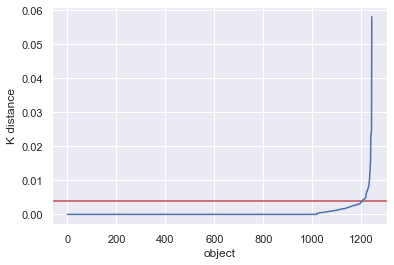

In [31]:
distance = np.sort(distances, axis=0)
distance = distance[:,1]
plt.axhline(y=0.004, color='r', linestyle='-')
plt.plot(distance)
plt.xlabel('object')
plt.ylabel('K distance')
plt.savefig('DBSCAN_op.png')

An optimum eps epsilon=0.04 is used. Different minimum samples for DBSCAN is used and analyze in reports. Based on different mimimum samples, they have different clusters. For example, in mimimum samples =20, only 11 clusters are defined. Whereas mimimum samples =5, more than 20 clusters are defined. 

In [46]:
epsilon = 0.04
minimumSamples = 20
#X_std is used to do DBSCAN
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_std)
labels = db.labels_
pd.set_option('display.max_rows', None)
labels

array([-1, -1, -1, ..., -1, -1,  9])

In [47]:
df = pd.DataFrame({'cluster': labels})
df['cluster'].unique() #shows number of clusters

array([-1,  0,  1,  2,  3,  4,  5,  9,  6,  7,  8, 10])

In [48]:
#append to new column with their respective cluster number
raw_test_ = r_append
raw_test_ = raw_test_.join(df)
raw_test = raw_test_[raw_test_.cluster != -1] #-1 is the variables where it is not included in any cluster, hence the data with cluster=-1 is removed.
raw_test

,index,Unnamed: 0,Building name,Related probable/confirmed cases,count,lat_col,long_col,Unnamed: 0.1,cluster
27,15,487,"Kam Fai Building, Yee Kuk Street",4278,1,22.329273,114.158559,487.0,0
29,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
30,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
31,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
32,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
33,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
34,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
35,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
36,18,490,"Kam Hon House, Choi Hung Estate","3829, 3830, 3988, 4091, 4126, 4127, 4129, 4131",8,22.335458,114.206231,490.0,1
38,20,492,"Kam Lan House, Kam Fung Court","4267, 4404",2,22.370047,114.114750,492.0,2


In [49]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

11

In [50]:
# create map
latitude =22.329
longitude = 114.169
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters_)
ys = [i + x + (i*x)**2 for i in range(n_clusters_)]

#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, count in zip(raw_test['lat_col'], raw_test['long_col'], raw_test['Building name'], raw_test['cluster'],raw_test['count']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters.save('dbscan20.html')
map_clusters